# Filtering

원본 image에 2가지 종류의 filter를 적용하는 함수를 구현해보자
1. average : 모든 픽셀값이 1인 mask로 흐릿하게 만들어줍니다.
2. sharpening : 중앙이 2인 mask에 모든 픽셀이 1/n인 mask를 뺀 mask를 적용해 image를 선명하게 만듭니다.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## my_filtering

In [2]:
def my_filtering(src, ftype, fsize):
    
    (h, w) = src.shape
    dst = np.zeros((h, w))
    row_size, col_size = fsize
    if ftype == 'average':
        #print('average filtering')

        mask = np.zeros((row_size, col_size), dtype=np.float)
        mask[0:row_size, 0:col_size] = 1/(row_size*col_size)

        #mask 확인
        #print(mask)
        
    elif ftype == 'sharpening':
        #print('sharpening filtering')

        mask = np.zeros((row_size, col_size), dtype = np.float)
        mask_1 = np.zeros((row_size, col_size), dtype = np.float)
        mask_2 = np.zeros((row_size, col_size), dtype = np.float)

        center_1 = int((row_size - 1) / 2)
        center_2 = int((col_size - 1) / 2)

        mask_1[center_1, center_2] = 2.
        mask_2[0:row_size, 0:col_size] = 1 / (row_size*col_size)
        mask = mask_1 - mask_2
        #mask 확인
        #print(mask)


    hh = h - row_size + 1
    ww = w - col_size + 1
    imsi_dst = np.zeros(src.shape,dtype = np.float)
    for row in range(hh):
        for col in range(ww):
            imsi_dst = src[row:row_size + row, col:col_size + col]
            dst[int((row_size+1)/2+row-1), int((col_size+1)/2+col-1)] = np.sum(imsi_dst * mask)
            if dst[int((row_size+1)/2+row-1), int((col_size+1)/2+col-1)]>255:
                dst[int((row_size + 1) / 2 + row - 1), int((col_size + 1) / 2 + col - 1)] = 255
            elif dst[int((row_size+1)/2+row-1), int((col_size+1)/2+col-1)]<0:
                dst[int((row_size + 1) / 2 + row - 1), int((col_size + 1) / 2 + col - 1)] = 0
            ###채우기

    dst = (dst+0.5).astype(np.uint8)

    return dst

조건문을 이용해 average와 sharpening중 하나를 선택합니다.

이중 for문을 통해 mask를 적용한 image를 생성했는데, 오버플로우를 방지하기 위해 자료형을 uint8이 아닌 다른것으로 사용하였고, 255보다 크거나 0보다 작은값은 255와 0으로 만들었습니다.

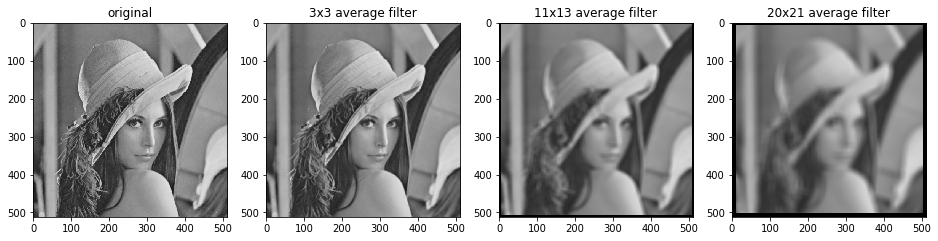

In [3]:

src = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)
# 3x3 filter
dst_average = my_filtering(src, 'average', (3,3))


# 11x13 filter
dst_average2 = my_filtering(src, 'average', (11,13))


# 20x21 filter
dst_average3 = my_filtering(src, 'average', (20,21))

fig, ax = plt.subplots(1,4, figsize = (16,9))

ax[0].set_title('original')
ax[0].imshow(cv2.cvtColor(src,cv2.COLOR_GRAY2RGB))

ax[1].set_title('3x3 average filter')
ax[1].imshow(cv2.cvtColor(dst_average,cv2.COLOR_GRAY2RGB))

ax[2].set_title('11x13 average filter')
ax[2].imshow(cv2.cvtColor(dst_average2,cv2.COLOR_GRAY2RGB))

ax[3].set_title('20x21 average filter')
ax[3].imshow(cv2.cvtColor(dst_average3,cv2.COLOR_GRAY2RGB))
plt.show()


average : mask의 크기가 커질수록 넓은 크기의 값을 받아서 한 부분으로 저장하기 때문에 더 평균값으로 가지고, 그로인해 뿌옇게 나옵니다.
바깥쪽이 검은 이유는 padding을 하지 않아 손실되는 값이 발생하기 때문입니다.

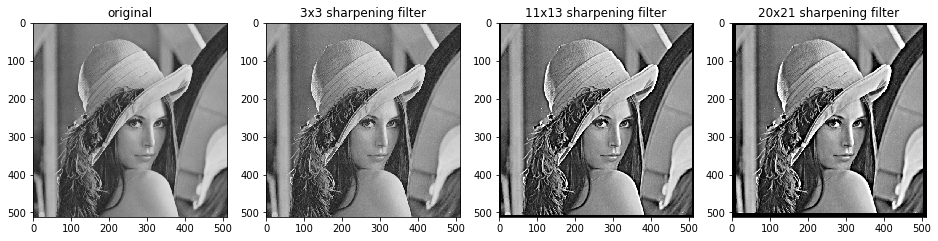

In [4]:

# 3x3 filter
dst_sharpening = my_filtering(src, 'sharpening', (3,3))


# 11x13 filter
dst_sharpening2 = my_filtering(src, 'sharpening', (11,13))


# 20x21 filter
dst_sharpening3 = my_filtering(src, 'sharpening', (20,21))

fig, ax = plt.subplots(1,4, figsize = (16,9))

ax[0].set_title('original')
ax[0].imshow(cv2.cvtColor(src,cv2.COLOR_GRAY2RGB))

ax[1].set_title('3x3 sharpening filter')
ax[1].imshow(cv2.cvtColor(dst_sharpening,cv2.COLOR_GRAY2RGB))

ax[2].set_title('11x13 sharpening filter')
ax[2].imshow(cv2.cvtColor(dst_sharpening2,cv2.COLOR_GRAY2RGB))

ax[3].set_title('20x21 sharpening filter')
ax[3].imshow(cv2.cvtColor(dst_sharpening3,cv2.COLOR_GRAY2RGB))
plt.show()

sharpening : mask의 크기가 커질수록 더 넓은 부분의 pixel은 음수로 값을 받고, 그로 인해 중앙의 값이 더 도드라집니다. 그래서 더욱 선명한(날카로운) image가 완성됩니다.